This project uses Random forest classification (Supervised machine learning) to determine whether a user purchase a product by seeing the advertisement.
Decision is taken based on 2 feature
1. Age
2. Salary

Note: For detailed explanation of functions and libraries used in this project please refer the .ppt file attached along with the code.

Created by : Aswin KS

In [1]:
# Importing the required libraries
import numpy as np   # For working with matrics and arrays
import matplotlib.pyplot as plt  #To draw graphs and plots
import pandas as pd #To work with tabular data


In [6]:
# Importing the dataset (data set is a csv file)
dataset = pd.read_csv('Social_Network_Ads.csv')

In [7]:
# Displaying the dataset
# head function will print the first 5 rows of the table
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
# Splitting the dataset features into X and y
#We divide the data in to features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
# Splitting the dataset into the Training set and Test set
# Using training set we will train a model 
# After training we will use the test set to test the mode
# sklearn is a library that contain many machine learning modules that allows us to train model train_test_split() is one of such function.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #0.25 indicates that we are usinf 75% as train ans 25% of data as test set

In [15]:
# Feature Scaling
#Feature scaling allows us to scale the values between a smaller value. It helps in faster computation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Scaled the train set
X_test = sc.transform(X_test) # Scaled the test set

In [16]:
# Training the Random Forest Classification model on the Training set
# Random forest is a supervised classification machine learning which workes with labeled data set. Labeled data set means the output of data is already labeled, in our case whether a user purchase (1) or not (0).

from sklearn.ensemble import RandomForestClassifier #importing the randomforest from sklearn
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)  #applying random forest classifier on train data set




RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))  #predicting a new result with Age as 30 and salart 87000

#You can see the output as 1, that means the user will buy the product

[1]


In [26]:
# Predicting the Test set results
# Here we are predicting the result for entire test set.

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [28]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[63  5]
 [ 4 28]]


In [34]:
#Evaluation Matrics
from sklearn.metrics import f1_score,precision_recall_curve,precision_score,plot_precision_recall_curve,recall_score

# We are using 3 matrix 1. accuracy 2. Precision 3. F1-Score

In [35]:
# Printing accuracy of model
print("Accuracy of Train is : ",accuracy_score(y_train, y_pred_train)) #Printing accuracy of train set
print("Accuracy of Test is : ", accuracy_score(y_test, y_pred)) #Printing accuracy of test set


Accuracy of Train is :  0.98
Accuracy of Test is :  0.91


In [40]:
# Printing precision of model
print("Precision of Train set is :",precision_score(y_train, y_pred_train))
print("Precision of Train set is :",precision_score(y_test, y_pred))

Precision of Train set is : 0.981651376146789
Precision of Train set is : 0.8484848484848485


In [42]:
# Printing F1-score of model

print("Precision of Train set is :",f1_score(y_train, y_pred_train))
print("Precision of Test set is :",f1_score(y_test, y_pred))

Precision of Train set is : 0.9727272727272728
Precision of Test set is : 0.8615384615384615


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


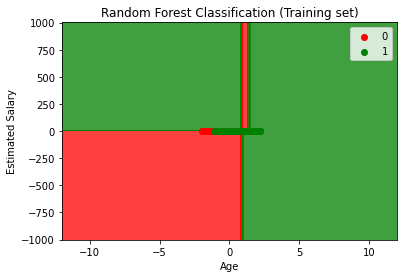

In [23]:
# Visualising the Training set result.

from matplotlib.colors import ListedColormap # we use matplotlib for ploting graphs
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')  #title of graph
plt.xlabel('Age') # x axis label
plt.ylabel('Estimated Salary') # y axis label
plt.legend() #for showing the 0 and 1 legent in graph
plt.show() #To print the result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


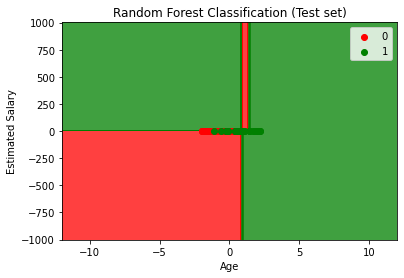

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()